# Code to analyze baseline models

In [6]:
from results_imports import *

import glob

In [12]:
## load grid data
training_data = TemporalMultiGrid(feature_file)
om = TemporalGrid(label_file)

In [5]:

def evaulte_model_statistically(model_file, om, year, model_name = ''):
    """
    """
    
    if type(model_file) is str:
        clf = joblib.load(model_file)
    else: 
        clf = model_file
        
    ov = clf.verbose
    clf.verbose = 0 
    new = tools.apply_model_to_year(clf, training_data, year, training_data.config['mask'])

#     tools.quick_coolwarm(om[year] , 'original model ' + str(year))
#     tools.quick_coolwarm(new , model_name + ' '+ str(year))

    
    diff = (new -om[year])
#     tools.to_figure(diff , '',  'comparison ' + str(year),cmap = 'coolwarm', vmin=-10,vmax=10, save=False)

    stats = {
        'min diff': np.nanmin(diff), 
        'max diff': np.nanmax(diff),
        'mean diff': np.nanmean(diff),
        'abs mean diff': np.nanmean(np.abs(diff)),
        'max abs diff': np.nanmax(np.abs(diff)),
        'min abs diff': np.nanmin(np.abs(diff)),
        'min predict':np.nanmin(new),
        'max predict':np.nanmax(new), 
    }
    clf.verbose = ov
    return stats

def evaulte_model_pictorially(model_file, om, year, model_name = ''):
    """
    """
    import pprint
    if type(model_file) is str:
        clf = joblib.load(model_file)
    else: 
        clf = model_file
        
    ov = clf.verbose
    clf.verbose = 0
    new = tools.apply_model_to_year(clf, training_data, year, training_data.config['mask'])

#     tools.quick_coolwarm(om[year] , 'original model ' + str(year))
#     tools.quick_coolwarm(new , model_name + ' '+ str(year))

    tools.to_figure(om[year] , 'original model ' + str(year),cmap = 'coolwarm', vmin=-40,vmax=40, save=False)
    tools.to_figure(new , model_name + ' '+ str(year),cmap = 'coolwarm', vmin=-40,vmax=40, save=False)



    
    diff = (new -om[year])
    tools.to_figure(diff , '',  'comparison ' + str(year),cmap = 'coolwarm', vmin=-10,vmax=10, save=False)

    stats = evaulte_model_statistically(clf, om, year, model_name)
    pprint.pprint(stats)
    
#     print ('min diff:', np.nanmin(diff), 'max diff:', np.nanmax(diff))
#     print ('mean diff:', np.nanmean(diff), 'abs mean diff:', np.nanmean(np.abs(diff)))
    clf.verbose = ov
    return clf





In [4]:
fi_stats = read_csv('../results/baseline-models-fi.csv', index_col=0)
fi_stats

,aspect,elev,ewp,fdd,fwp,lat,long,lsp,slope,sp,sp+1,tdd,tdd+1
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,0.001,0.002,4.970,4.883,38.839,11.251,12.106,5.256,0.075,3.698,3.777,5.406,9.737
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,0.002,0.003,4.982,4.890,38.800,11.244,12.102,5.266,0.076,3.708,3.786,5.408,9.732
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,0.002,0.003,4.982,4.890,38.800,11.244,12.102,5.266,0.076,3.708,3.786,5.408,9.732
rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml,0.002,0.002,4.944,4.884,38.814,11.278,12.189,5.209,0.074,3.666,3.748,5.426,9.763
rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml,0.002,0.002,4.944,4.884,38.814,11.278,12.189,5.209,0.074,3.666,3.748,5.426,9.763
rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50.yml,0.002,0.002,4.956,4.891,38.776,11.270,12.184,5.221,0.075,3.681,3.757,5.427,9.757
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml,0.002,0.003,4.995,4.891,38.825,11.228,12.079,5.281,0.073,3.723,3.768,5.396,9.736
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml,0.002,0.003,4.999,4.893,38.812,11.226,12.078,5.285,0.074,3.726,3.771,5.397,9.735
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml,0.003,0.003,4.999,4.893,38.812,11.226,12.078,5.284,0.074,3.725,3.771,5.397,9.735
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,0.001,0.002,4.970,4.883,38.839,11.251,12.106,5.256,0.075,3.698,3.777,5.406,9.737


In [13]:
## load and evaulte models for a subsample of years
model_files = glob.glob('/Volumes/toshi-stati/tk-rf-models/baseline-models/*.joblib')

data_frames = {}

# fig, ax = plt.subplots(figsize = (20, 12))
# ax.axis([0, 6, 0, 2])
for fp in model_files:
    print('-'*60)
    mn = fp.split('/')[-1][:-7]
    print(mn)
    ys = []
    for year in range(1905,2016,5):
#         print ("For year", year, ":")
        s = evaulte_model_statistically(fp, om, year, mn)
        s['year'] = year
        ys.append(s)
    
    df = DataFrame(ys)
    data_frames[mn] = df
#     df.plot.line(x='year', y='abs mean diff', label = mn, ax=ax )
#     print('-'*60, '\n')



------------------------------------------------------------
rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50
------------------------------------------------------------
rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50
------------------------------------------------------------
rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50
------------------------------------------------------------
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75
------------------------------------------------------------
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25
------------------------------------------------------------
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25
------------------------------------------------------------
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75
------------------------------------------------------------
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75
------------------------------------------------------------
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25
-----------------------------------------

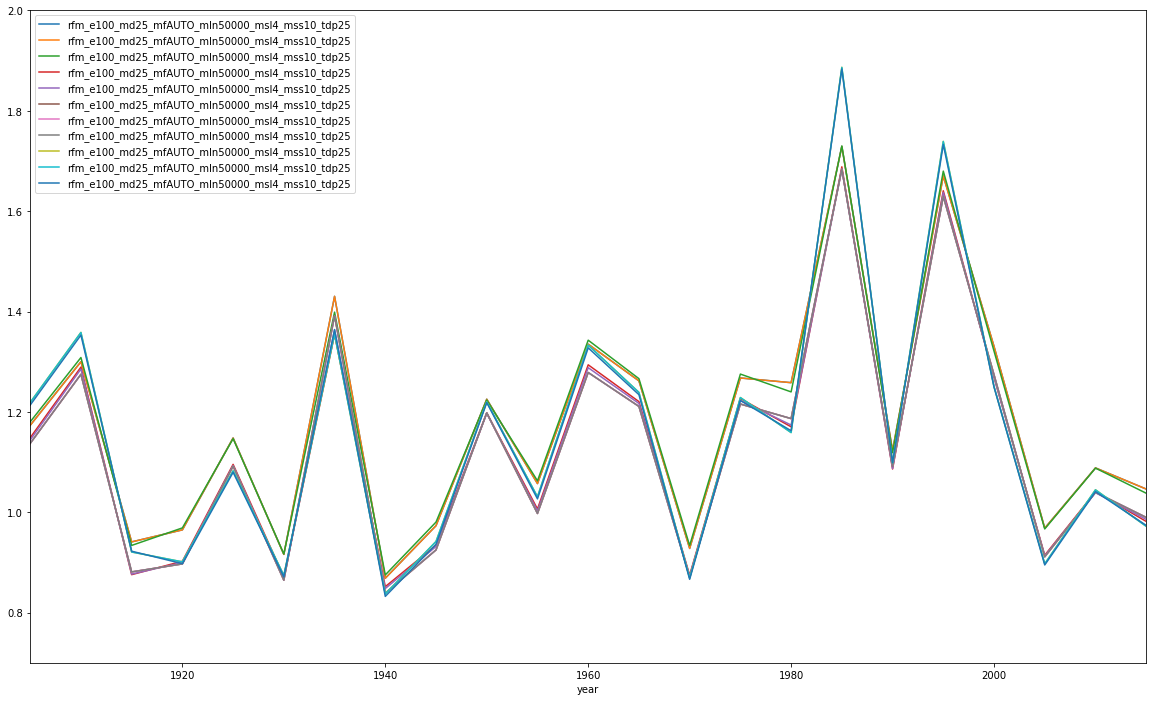

In [14]:
fig, ax = plt.subplots(figsize = (20, 12))
ax.axis([0, 6, .7, 2])
for df in data_frames:
    data_frames[df].plot.line(x='year', y='abs mean diff', label = mn, ax=ax )

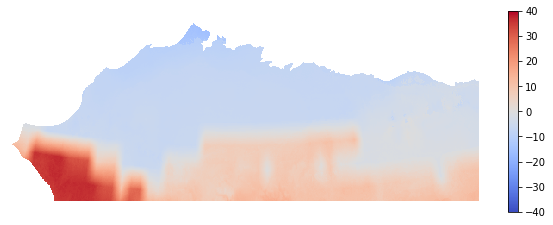

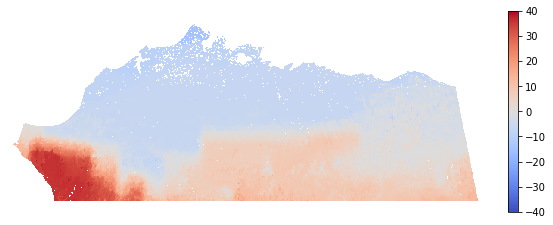

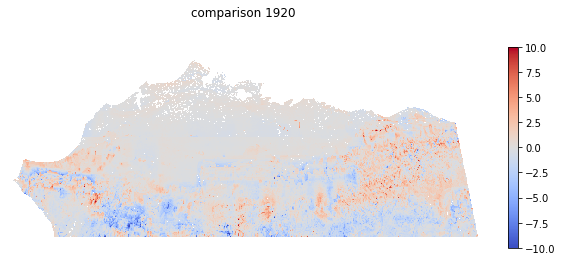

{'abs mean diff': 0.897555575662781,
 'max abs diff': 21.513696389259685,
 'max diff': 13.70754090663775,
 'max predict': 40.01816179322512,
 'mean diff': -0.031596250207916045,
 'min abs diff': 1.1906045358500705e-06,
 'min diff': -21.513696389259685,
 'min predict': -14.273558335365642}


In [15]:
# evaluate the last model loaded in loop two cells up, and then save the loaded version of that model back to fp
fp = evaulte_model_pictorially(fp, om, 1920, mn)